# The Automator's Initial Prototype Code for EDA

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading CSV files from kaggle

In [3]:
#importing kaggle dataset
import kagglehub
path = kagglehub.dataset_download("themrityunjaypathak/pandas-practice-dataset")
data = pd.read_csv(f"{path}/data.csv")
data.head()


d:\Projects\Project_1\The Automator\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [4]:
data.dtypes

Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

## Exploratory Data Analysis

### Descriptive Statistics

#### Measures of Central Tendency

In [ ]:
# Measures of Central Tendency : MEAN,MEDIAN,MODE
# code for mean
col_mean = {}
for i in data.select_dtypes(include='number').columns:
    col_mean[i] = data[i].mean()
print(col_mean)

#code for median
col_median={}
for i in data.select_dtypes(include='number').columns:
    col_median[i] = data[i].median()
print(col_median)

#code for mode
col_mode = {}
for i in data.columns:
    col_mode[i] = data[i].mode().tolist()

print(col_mode)

{'Duration': 68.4375, 'Pulse': 103.5, 'Maxpulse': 128.5, 'Calories': 304.68}
{'Duration': 60.0, 'Pulse': 102.5, 'Maxpulse': 127.5, 'Calories': 291.2}
{'Duration': [60], 'Date': ["'2020/12/12'"], 'Pulse': [100], 'Maxpulse': [120], 'Calories': [300.0]}


#### Measures of Variability

In [ ]:
# Measures of Variablility (Dispersion): Range,Variance,SD,IQR,MAD,CV
# Range
Range = {}
for i in data.select_dtypes(include='number').columns:
    Range[i] = data[i].max()-data[i].min()
print('Range: ',Range)

# Variance
Variance = {}
for i in data.select_dtypes(include='number').columns:
    Variance[i] = data[i].var()
print('Var: ',Variance)

# SD
SD={}
for i in data.select_dtypes(include='number').columns:
  SD[i]=data[i].std()
print('SD: ',SD)

#Inter Quartile Range
IQR ={}
for i in data.select_dtypes(include='number').columns:
  IQR[i]=data[i].quantile(0.75)-data[i].quantile(0.25)
print('IQR: ',IQR)

#Mean Absolute Deviation
MAD={}
for i in data.select_dtypes(include='number').columns:
  MAD[i]=abs(data[i]-data[i].mean()).mean()
print('MAD: ',MAD)

# Coefficient of variation
CV={}
for i in data.select_dtypes(include='number').columns:
  CV[i]=data[i].std()/data[i].mean()
print('CV: ',CV)

Range:  {'Duration': 420, 'Pulse': 40, 'Maxpulse': 74, 'Calories': 283.9}
Var:  {'Duration': 4905.544354838709, 'Pulse': 61.354838709677416, 'Maxpulse': 168.96774193548387, 'Calories': 4356.498896551724}
SD:  {'Duration': 70.03959133831886, 'Pulse': 7.8329329570523845, 'Maxpulse': 12.998759246000514, 'Calories': 66.00377941111951}
IQR:  {'Duration': 0.0, 'Pulse': 6.5, 'Maxpulse': 12.25, 'Calories': 93.27500000000003}
MAD:  {'Duration': 23.84765625, 'Pulse': 5.4375, 'Maxpulse': 8.96875, 'Calories': 53.85600000000001}
CV:  {'Duration': 1.0234095538019194, 'Pulse': 0.07568051166234188, 'Maxpulse': 0.10115765950194952, 'Calories': 0.21663312134409712}


#### Measures of Distribution

In [ ]:
# Measures of Distribution :
#skewness
Skewness={}
for i in data.select_dtypes(include='number').columns:
  Skewness[i]=data[i].skew()
print('Skewness: ',Skewness)

# positively/negatively/zero skewed
Pos_Neg_Skew={}
for i in Skewness.keys():
  if Skewness[i]>0:
    Pos_Neg_Skew[i]=1
  elif Skewness[i]<0:
    Pos_Neg_Skew[i]=2
  else:
    Pos_Neg_Skew[i]=0
print('+ve/-ve Skewness: ',Pos_Neg_Skew)

# Kurtosis
Kurtosis = {}
for i in data.select_dtypes(include='number').columns:
    Kurtosis[i] = data[i].kurtosis()
print('Kurtosis: ', Kurtosis)

# Heavy/Light tails classification
# 1 = Heavy Tails (Leptokurtic)
# 0 = Normal Tails (Mesokurtic),
# -1 = Light Tails (Platykurtic)

Heavy_Light_Tail = {}
for i in Kurtosis.keys():
    if Kurtosis[i] > 3:
        Heavy_Light_Tail[i] = 1  # Heavy Tails
    elif Kurtosis[i] < 3:
        Heavy_Light_Tail[i] = -1  # Light Tails
    else:
        Heavy_Light_Tail[i] = 0  # Normal Tails
print('Hvy/Light Tail: ', Heavy_Light_Tail)


#Quantiles
Quantiles={}
for i in data.select_dtypes(include='number').columns:
  Quantiles[i]=data[i].quantile([0.25,0.5,0.75]).tolist()
print('Quantiles: ',Quantiles)

#Deciles
Deciles={}
for i in data.select_dtypes(include='number').columns:
  Deciles[i]=data[i].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).tolist()
print('Deciles: ',Deciles)

Skewness:  {'Duration': 5.548443136530485, 'Pulse': 1.2872394290232436, 'Maxpulse': 1.3567952816219306, 'Calories': 0.6862712303263262}
+ve/-ve Skewness:  {'Duration': 1, 'Pulse': 1, 'Maxpulse': 1, 'Calories': 1}
Kurtosis:  {'Duration': 31.18116358134762, 'Pulse': 3.3334450742764434, 'Maxpulse': 4.566712249802704, 'Calories': 0.13658865719772884}
Hvy/Light Tail:  {'Duration': 1, 'Pulse': 1, 'Maxpulse': 1, 'Calories': -1}
Quantiles:  {'Duration': [60.0, 60.0, 60.0], 'Pulse': [100.0, 102.5, 106.5], 'Maxpulse': [120.0, 127.5, 132.25], 'Calories': [250.7, 291.2, 343.975]}
Deciles:  {'Duration': [45.0, 48.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 450.0], 'Pulse': [97.1, 98.4, 100.0, 100.8, 102.5, 103.0, 104.7, 108.8, 110.0, 130.0], 'Maxpulse': [118.1, 120.0, 120.89999999999999, 124.4, 127.5, 130.6, 132.0, 133.8, 144.10000000000002, 175.0], 'Calories': [242.8, 249.2, 252.52, 278.0, 291.2, 309.2, 336.15, 366.16, 382.87000000000006, 479.0]}


#### Measures of Shape & Spread

In [ ]:
# Measures of shape & spread: Min/Max,5-numsum(min,q1,median,q3,max)
shapenspread = data.describe()
print(shapenspread)

         Duration       Pulse    Maxpulse    Calories
count   32.000000   32.000000   32.000000   30.000000
mean    68.437500  103.500000  128.500000  304.680000
std     70.039591    7.832933   12.998759   66.003779
min     30.000000   90.000000  101.000000  195.100000
25%     60.000000  100.000000  120.000000  250.700000
50%     60.000000  102.500000  127.500000  291.200000
75%     60.000000  106.500000  132.250000  343.975000
max    450.000000  130.000000  175.000000  479.000000


#### Measures of Relationship (Multiple Variables)

In [ ]:
# Measures of Relationship : Corr Coeff, CoV,CrossTab

# Correlation Coefficient (Pearson,Spearman,kendall)
correlation_coeff = {}
for col1 in data.select_dtypes(include='number').columns:
    for col2 in data.select_dtypes(include='number').columns:
        if col1 != col2:
            correlation_coeff[(col1, col2)] = {
                'Pearson': data[col1].corr(data[col2], method='pearson'),
                'Spearman': data[col1].corr(data[col2], method='spearman'),
                'Kendall': data[col1].corr(data[col2], method='kendall')
            }
print('CorrCoeff: ',correlation_coeff)

#Covariance
Covariance = {}
for col1 in data.select_dtypes(include='number').columns:
    for col2 in data.select_dtypes(include='number').columns:
        if col1 != col2:
            Covariance[(col1, col2)] = data[col1].cov(data[col2])
print('Cov: ',Covariance)

#Cross Tabulation (for categorical features only)
Cross_Tab = {}
for col1 in data.select_dtypes(include='object').columns:
    for col2 in data.select_dtypes(include='object').columns:
        if col1 != col2:
            Cross_Tab[(col1, col2)] = pd.crosstab(data[col1], data[col2])
print('CrossTab: ',Cross_Tab)

CorrCoeff:  {('Duration', 'Pulse'): {'Pearson': 0.004409928587480161, 'Spearman': -0.034108664184295055, 'Kendall': -0.016211906245753773}, ('Duration', 'Maxpulse'): {'Pearson': 0.04995879046354989, 'Spearman': -0.07339393743951235, 'Kendall': -0.05744177055001674}, ('Duration', 'Calories'): {'Pearson': -0.11416902550347031, 'Spearman': 0.19324647076163579, 'Kendall': 0.158113883008419}, ('Pulse', 'Duration'): {'Pearson': 0.0044099285874801605, 'Spearman': -0.034108664184295055, 'Kendall': -0.016211906245753773}, ('Pulse', 'Maxpulse'): {'Pearson': 0.2765834823573775, 'Spearman': 0.6585994807845093, 'Kendall': 0.5408955811055326}, ('Pulse', 'Calories'): {'Pearson': 0.5131859760812312, 'Spearman': 0.6302143584539076, 'Kendall': 0.5121728213884001}, ('Maxpulse', 'Duration'): {'Pearson': 0.04995879046354989, 'Spearman': -0.07339393743951236, 'Kendall': -0.05744177055001673}, ('Maxpulse', 'Pulse'): {'Pearson': 0.2765834823573775, 'Spearman': 0.6585994807845093, 'Kendall': 0.5408955811055326

#### Measures of Frequency (Frequency Analysis)

In [ ]:
#Frequency Analysis: Counts,Proportions/percentages,CF
# Counts: Frequency of each category/value data | hehe meoww! :3
Counts = {}
for col in data.select_dtypes(exclude='number').columns:
    Counts[col] = data[col].value_counts().to_dict()
print('Counts: ',Counts)

# Proportions/percentages : The relative freq of categorical data
proportions = {}
for col in data.select_dtypes(exclude='number').columns:
    proportions[col] = (data[col].value_counts(normalize=True) * 100).to_dict()
print('Proportions: ',proportions)

# Cumulative Frequency
cumulative_freq = {}
for col in data.select_dtypes(include='number').columns:
  sorted_data = data[col].value_counts().sort_index()
  cumulative_freq[col] = sorted_data.cumsum().to_dict()
print('Cumulative Freq: ',cumulative_freq)

Counts:  {'Date': {"'2020/12/12'": 2, "'2020/12/01'": 1, "'2020/12/17'": 1, "'2020/12/30'": 1, "'2020/12/29'": 1, "'2020/12/28'": 1, "'2020/12/27'": 1, '20201226': 1, "'2020/12/25'": 1, "'2020/12/24'": 1, "'2020/12/23'": 1, "'2020/12/21'": 1, "'2020/12/20'": 1, "'2020/12/19'": 1, "'2020/12/18'": 1, "'2020/12/16'": 1, "'2020/12/02'": 1, "'2020/12/15'": 1, "'2020/12/14'": 1, "'2020/12/13'": 1, "'2020/12/11'": 1, "'2020/12/10'": 1, "'2020/12/09'": 1, "'2020/12/08'": 1, "'2020/12/07'": 1, "'2020/12/06'": 1, "'2020/12/05'": 1, "'2020/12/04'": 1, "'2020/12/03'": 1, "'2020/12/31'": 1}}
Proportions:  {'Date': {"'2020/12/12'": 6.451612903225806, "'2020/12/01'": 3.225806451612903, "'2020/12/17'": 3.225806451612903, "'2020/12/30'": 3.225806451612903, "'2020/12/29'": 3.225806451612903, "'2020/12/28'": 3.225806451612903, "'2020/12/27'": 3.225806451612903, '20201226': 3.225806451612903, "'2020/12/25'": 3.225806451612903, "'2020/12/24'": 3.225806451612903, "'2020/12/23'": 3.225806451612903, "'2020/12

#### Dataset-level Descriptions

In [ ]:
# Dimensions
dimensions = {}
dimensions['Rows'] = data.shape[0]
dimensions['Cols'] = data.shape[1]
print('Dimensions: ',dimensions)

# Datatypes
datatypes = {}
for col in data.columns:
    datatypes[col] = data[col].dtype
print('Datatypes: ',datatypes)

# Missing values
missing_values = {}
for col in data.columns:
    missing_values[col] = data[col].isna().sum()
print('Missing Values: ',missing_values)

# Unique values
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].nunique()
print('Unique Values: ',unique_values)

# Duplicate values
duplicate_values = {}
for col in data.columns:
    duplicate_values[col] = data[col].duplicated().sum()
print('Duplicate Values: ',duplicate_values)

Dimensions:  {'Rows': 32, 'Cols': 5}
Datatypes:  {'Duration': dtype('int64'), 'Date': dtype('O'), 'Pulse': dtype('int64'), 'Maxpulse': dtype('int64'), 'Calories': dtype('float64')}
Missing Values:  {'Duration': 0, 'Date': 1, 'Pulse': 0, 'Maxpulse': 0, 'Calories': 2}
Unique Values:  {'Duration': 4, 'Date': 30, 'Pulse': 15, 'Maxpulse': 24, 'Calories': 26}
Duplicate Values:  {'Duration': 28, 'Date': 1, 'Pulse': 17, 'Maxpulse': 8, 'Calories': 5}


### Detecting NA values

In [5]:
# Checking if any NA values present
data.isna().any().any()

np.True_

In [6]:
len(data['Date'].unique())

31

In [7]:
data.isna().sum() * 100 / len(data)
# data.iloc[2,1]=np.nan
# data.iloc[3,1]=np.nan
# data.isna().sum()

df = pd.to_datetime(data['Date'], errors='coerce')
print(df)

0    2020-12-01
1    2020-12-02
2    2020-12-03
3    2020-12-04
4    2020-12-05
5    2020-12-06
6    2020-12-07
7    2020-12-08
8    2020-12-09
9    2020-12-10
10   2020-12-11
11   2020-12-12
12   2020-12-12
13   2020-12-13
14   2020-12-14
15   2020-12-15
16   2020-12-16
17   2020-12-17
18   2020-12-18
19   2020-12-19
20   2020-12-20
21   2020-12-21
22          NaT
23   2020-12-23
24   2020-12-24
25   2020-12-25
26          NaT
27   2020-12-27
28   2020-12-28
29   2020-12-29
30   2020-12-30
31   2020-12-31
Name: Date, dtype: datetime64[ns]


In [8]:
#!pip install verstack

In [9]:
# #percentage of na in a col
# from scipy.stats import shapiro,skew
# from verstack import NaNImputer

# missing_info = {}
# percent_null = data.isna().sum() * 100 / len(data)
# imputer = NaNImputer()

# def is_continuous(data, col, uniqueness_threshold=0.2):
#     if data[col].dtype in ['float64', 'int64']:
#         unique_ratio = len(data[col].unique()) / len(data[col])
#         return unique_ratio >= uniqueness_threshold
#     return False

# def is_categorical(data, col):
#     if data[col].dtype == 'object' or data[col].dtype.name == 'category':
#         # check if the number of unique values is low compared to the number of rows
#         unique_ratio = len(data[col].unique()) / len(data[col])
#         return unique_ratio < 0.2
#         # Categorical columns typically have a lower unique value ratio
#     return False

# def is_normal(data, col):
#     non_na_values = data[col].dropna()
#     stat, p = shapiro(non_na_values)
#     return p > 0.05  # If p > 0.05, data is normally distributed

# def is_skewed(data, col, skew_threshold=0.5):
#     non_na_values = data[col].dropna()
#     skew_value = skew(non_na_values)
#     return abs(skew_value) > skew_threshold
#    # If skewness is greater than threshold, data is skewed

# def id_timeseries_or_ordered(data,col):
#         # Check if the column is already datetime or can be converted to datetime
#         if pd.api.types.is_datetime64_any_dtype(data[col]) or pd.to_datetime(data[col], errors='coerce').notna().all():
#             print("timeserdata")
#             return True
#         # Check if the column is numerically ordered (monotonically increasing/decreasing)
#         if pd.api.types.is_numeric_dtype(data[col]):
#             if data[col].is_monotonic_increasing or data[col].is_monotonic_decreasing:
#                 print("ordered")
#                 return True
#         # If the column is neither datetime-like nor ordered, return False
#         return False

# # print(percent_null)
# for col in percent_null.keys():
#   if (percent_null[col]>0):
#     if (percent_null[col]<=5):
#         missing_info[col] = percent_null[col]
#         # <5% is minimal hence we'll drop the row
#         print(f"{col}: Dropping rows with NaN values.")
#         data.dropna(subset=[col],inplace=True)
#     elif (5<percent_null[col]<=20):
#       missing_info[col] = percent_null[col]
#       # 5-20% Null is moderate, we'll imputate
#       # 1. We'll do mean if the data is cont.&normallydist
#       #    For cont.: well check  if its numeric & % of unique data is >20%
#       #    For normality, we'll do a Shapiro-Wilk test
#       # 2. We'll do median if data is cont.&skewed
#       #    For cont.: well check  if its numeric & % of unique data is >20%
#       #    For skewness, well test it with skew()
#       # 3. We'll do mode if its categorical
#       #    For that we'll check if its an object & % of unique data is <20%
#       if is_continuous(data,col):
#         if is_normal(data,col):
#           print(f"{col}: Filling NaN with mean (normal distribution){data[col].mean()}.")
#           data[col] = data[col].fillna(data[col].mean())
#         elif is_skewed(data,col):
#           print(f"{col}: Filling NaN with median (skewed distribution){data[col].median()}.")
#           data[col] = data[col].fillna(data[col].median())
#       elif is_categorical(data,col):
#         print(f"{col}: Filling NaN with mode (most frequent value){data[col].mode()}.")
#         data[col] = data[col].fillna(data[col].mode()[0])
#       # For time series/ordered data , we'll do forward/backward fill
#       elif id_timeseries_or_ordered(data,col):
#         print(f"{col}: Filling NaN with forward/backward fill.")
#         data[col] = data[col].fillna(method='ffill').fillna(method='bfill')

#     # also linear interpolation & multiple imputaion & forward/backward fill remaining

#     elif (20<percent_null[col]<=40):
#       # 20-40% is a lot of missing values but still its workable with predictive imputation
#       missing_info[col] = percent_null[col]
#       print("we'll do Predictive imputation/model based approach")
#       data[col] = data[col]
#       df_imputed = imputer.impute(df_with_nans)

#     elif (percent_null[col]>40):
#       # More than 40% of the data is null, the column is unsavable
#       missing_info[col] = percent_null[col]
#       print("Dropping the whole column ")
#       data.drop(columns=[col],inplace=True)
# print(missing_info)


In [10]:
# OR JUST USE THE NANIMPUTER
# !pip install verstack
from verstack import NaNImputer
imputer = NaNImputer()
df_imputed = imputer.impute(data)


 * Initiating NaNImputer.impute
     . Dataset dimensions:
     .. rows:         32
     .. columns:      5
     .. mb in memory: 0.0
     .. NaN cols num: 2

   - Drop hopeless NaN cols

   - Processing whole data for imputation

   - Imputing single core 2 cols
     . Imputed (multiclass) - 1        NaN in Date
     . Imputed (regression) - 2        NaN in Calories

   - Missing values after imputation: 0

Time elapsed for impute execution: 0.89859 seconds


In [11]:
df_imputed.isna().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [12]:
# # idk why tf i coded this when i coudve just used isna().sum()..........SMH
# # JSONifying the cols with na
# from textwrap import indent
# import json
# cols = {}
# for i in data.columns:
#    #(print(i,data[i].isna().sum()))
#    cols[i] = int(data[i].isna().sum())
# json_Result = json.dumps(cols, indent=4)
# print(json_Result)

## Data Vizualization

In [60]:
# Types of data viz
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

class vizualize:
    def __init__(self):
        pass
    # Overview #
    def histo(self,col):
        # histograms
        plt.hist(col,bins=5,alpha=0.5,label=col.name)
        plt.xlabel(col.name)
        plt.ylabel('frequency')
        plt.title(f'Histogram of {col.name}')
        plt.legend()
        plt.show()

    def boxplt(self,col):
        # box plot
        plt.boxplot(col)
        plt.xlabel(col.name)
        plt.ylabel('values')
        plt.title(f'Boxplot of {col.name}')
        plt.show()

    def barchrt(self,col):
        # bar charts
        col.value_counts().plot(kind='bar')
        plt.xlabel(col.name)
        plt.ylabel('frequency')
        plt.title(f'Bar chart of {col.name}')
        plt.show()

    def piechrt(self,col):
        # Pie charts
        col.value_counts().plot(kind='pie')
        plt.xlabel(col.name)
        plt.ylabel('frequency')
        plt.title(f'Pie chart of {col.name}')
        plt.show()

    # Data Distribution

    def densityplots(self,col):
        # density plots
        col.plot.density(color='green')
        plt.xlabel(col.name)
        plt.ylabel('density')
        plt.title(f'Density plot of {col.name}')
        plt.show()

    def violinplots(self,col):
        # violin plots
        plt.violinplot(col)
        plt.xlabel(col.name)
        plt.ylabel('values')
        plt.title(f'Violin plot of {col.name}')
        plt.show()

    def ridgeplots(self,col):
        # ridge plots
        # for categorical data features
        pass

    # missing data vizualizations
    def heatmaps_na(self,df):
        # heatmaps for missing data
        missing_corr = df.isna().corr()

        sns.heatmap(missing_corr,annot=True, cmap='coolwarm',cbar=True)
        plt.xlabel('columns')
        plt.ylabel('rows')
        plt.title('Correlation of missing data')
        plt.show()

    def missingness_matrix(self,df):
        # missingness matrix
        msno.matrix(df)
        plt.title('Missingness Matrix')
        plt.show()

    def barplots_na(self,df):
        # barplots for na counts
        missing_counts = df.isna().sum()
        missing_counts.plot(kind='bar',color='skyblue',edgecolor='black')
        plt.title('Missing Values per column')
        plt.xlabel('columns')
        plt.ylabel('missing values count')
        plt.xticks(rotation=0)
        plt.show()

    # vizualization for relationships
    def scatterplt(self,col1,col2):
        # scatter plots
        plt.scatter(col1,col2)
        plt.xlabel(col1.name)
        plt.ylabel(col2.name)
        plt.title(f'Scatter plot of {col1.name} vs {col2.name}')
        plt.show()

    def bubblechrts(self,col1,col2,col3):
        # bubble charts
        fig = px.scatter(x=col1, y=col2, size=col3)
        fig.show()

    def pairplots(self,df):
        # pair plots
        sns.pairplot(df)
        plt.show()
        # will add more support for the user to choose the plotting variables

    # categorical data relationship vizualization
    def barplts_cat(self,col1,col2):
        # Bar Plot: Compare categories of one variable with another
        sns.barplot(x=col1,y=col2,ci=None,palette='viridis')
        plt.xlabel(col1.name)
        plt.ylabel(col2.name)
        plt.title(f'Bar plot of {col1.name} vs {col2.name}')
        plt.show()

    def cnt_plts(self,col):
        # Count Plot: Frequency distribution of categorical variables
        sns.countplot(x=col)
        plt.xlabel(col.name)
        plt.ylabel('count')
        plt.title(f'Count plot of {col.name}')
        plt.show()

    def stacked_brplts(self,df,col1,col2):
        # stacked bar charts
        # Stacked Bar Chart: Show proportions of categories within a larger category
        stacked_data = df.groupby([col1.name,col2.name]).size().unstack(fill_value=0)
        stacked_data.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
        plt.title('Sales Split by Product Category and Region', fontsize=16)
        plt.xlabel(col1.name, fontsize=12)
        plt.ylabel(col2.name, fontsize=12)
        plt.legend(title='Product Category')
        plt.tight_layout()
        plt.show()

    # multivariate distribution vizualization
    def heatmaps_mul(self,df):
        # heatmaps
        # plt.figure(figsize=(8, 6))
        # correlation_matrix = df[['Sales', 'Profit', 'Cost']].corr()
        # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        # plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
        # plt.show()
        sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')
        plt.title('Correlation Heatmap')
        plt.show()

    def facetgrids(self,df,col1,col2,col3):
        # facet grids
        # sns.set(style="whitegrid")
        # g = sns.FacetGrid(df, col="col1", hue="col2", height=4, aspect=1)
        # g.map(sns.histplot, "col3", kde=True, alpha=0.7).add_legend()
        # g.fig.subplots_adjust(top=0.9)
        # g.fig.suptitle('Distribution of col3 by col1 Across col2', fontsize=16)
        # plt.show()

        grids = sns.FacetGrid(df,row=col1.name,col=col2.name)
        grids.map(plt.scatter,col1.name,col2.name,edgecolor='w')
        grids.add_legend()
        plt.show()

    def plots_3d(self,col1,col2,col3):
        # 3d plots
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111,projection='3d')
        ax.scatter(col1,col2,col3,c='blue',marker='o',s=100)
        ax.set_title(f'3d Plot : {col1.name} vs. {col2.name} vs {col3.name}',fontsize=16)
        ax.set_xlabel(col1.name,fontsize=12)
        ax.set_ylabel(col2.name, fontsize=12)
        ax.set_zlabel(col3.name, fontsize=12)
        plt.show()

    # time series vizualization
    def line_chrts(self,col1,col2):
        # line charts
        plt.figure(figsize=(10,6))
        plt.plot(col1,col2,marker="o",linestyle="-",color="blue")
        plt.title(f'f{col2.name} vs {col1.name}',fontsize=16)
        plt.xlabel(col1.name,fontsize=12)
        plt.ylabel(col2.name,fontsize=12)
        plt.grid()
        plt.show()

    def area_chrts(self,col1,col2):
        # area charts
        plt.figure(figsize=(10,6))
        plt.fill_between(col1,col2,color='skyblue',alpha=0.4)
        plt.plot(col1,col2,marker='o',color='blue')
        plt.title(f'{col2.name} vs {col1.name}',fontsize=16)
        plt.xlabel(col1.name,fontsize=12)
        plt.ylabel(col2.name,fontsize=12)
        plt.grid()
        plt.show()

    def heatmps_ts(self,df,col1,col2,col3):
        # heatmaps
        cols_pivot = pd.pivot(data=df,index=col1.name,columns=col2.name,values=col3.name)
        plt.figure(figsize=(12,8))
        sns.heatmap(cols_pivot,cmap='YlGnBu',annot=False)
        plt.xlabel(col2.name,fontsize=12)
        plt.ylabel(col1.name,fontsize=12)
        plt.title(f'{col3.name} HeatMap ({col1.name} vs {col2.name})',fontsize=16)
        plt.show()

    def lag_plots(self,col1):
        # lag plots
        plt.figure(figsize=(6,6))
        pd.plotting.lag_plot(col1,lag=1)
        plt.title(f'Lag Plot: {col1.name}',fontsize=16)
        plt.xlabel(f'{col1.name} (t)',fontsize=12)
        plt.ylabel(f'{col1.name} (t+1)',fontsize=12)
        plt.grid()
        plt.show()

    # outlier vizualization

    def outlier_boxplots(self,col1):
        # boxplots
        plt.figure(figsize=(8,6))
        sns.boxplot(x=col1,color='skyblue')
        plt.title(f'Boxplot of {col1.name}',fontsize=16)
        plt.xlabel(col1.name,fontsize=12)
        plt.show()

    def outlier_scatterplots(self,col1):
        # scatter plots
        plt.figure(figsize=(8,6))
        plt.scatter(df.index,col1,color='blue',alpha=0.7)
        plt.axhline(col1.mean()+2*col1.std(),color='red',linestyle='--',label='Upper Threshold')
        plt.axhline(col1.mean()-2*col1.std(),color='red',linestyle='--',label='Lower Threshold')
        plt.title('Scatter Plot with Threshold',fontsize=16)
        plt.xlabel('Index',fontsize=12)
        plt.ylabel(col1.name,fontsize=12)
        plt.legend()
        plt.show()

    def outlier_zscore_viz(self,col1):
        z_scores = (col1-col1.mean())/col1
        plt.figure(figsize=(8,6))
        plt.hist(z_scores,bins=10,color='lightblue',edgecolor='black')
        plt.axvline(2,color='red',linestyle='--',label='Outlier Threshold')
        plt.axvline(-2,color='red',linestyle='--')
        plt.title('Z-Score Histogram',fontsize=16)
        plt.xlabel('Z-Score',fontsize=12)
        plt.ylabel('Frequency',fontsize=12)
        plt.legend()
        plt.show()

    def outlier_iqrplots(self,df,col1):
        # z-score / IQR vizualization
        Q1 = col1.quantile(0.25)
        Q3 = col1.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        plt.figure(figsize=(8,6))
        plt.scatter(df.index,col1,color='blue',alpha=0.7)
        plt.axhline(upper_bound,color='orange',
        linestyle='--',label='Upper Bound')
        plt.axhline(lower_bound, color="green", linestyle="--", label="Lower Bound")
        plt.title('IQR Method for Outlier Detection',fontsize=16)
        plt.xlabel('Index',fontsize=12)
        plt.ylabel(col1.name,fontsize=12)
        plt.legend()
        plt.show()

    # geographic data vizualization
    def choropleth_mps():
        # choropleth maps
        pass
    def bubble_mps():
        # bubble maps
        pass
    def heatmaps_mps():
        # heatmaps on maps
        pass

    # advanced data viz
    def prll_coord_plts():
        # parallel coordinate plots
        pass
    def rad_chrts():
        # radial charts (spider/radar charts)
        pass
    def word_cnts():
        # word counts
        pass
    def sankey_diagrams():
        # sankey diagrams
        pass
    # Machine Learning data viz
    def feat_imp_plts():
        # feature imp plots
        pass
    def resid_plts():
        # residual plots
        pass
    def roc_curves():
        # ROC curve
        pass
    def conf_mat():
        # Conf Matrix
        pass

#### double checking

In [ ]:
freq_200_250= 0
Freq_250_300 = 0
Freq_300_350 = 0
Freq_350_400 = 0
freq_400_450 = 0
freq_450_500 = 0

for i in df_imputed['Calories']:
  if i >= 200 and i < 250:
    freq_200_250 += 1
  elif i >= 250 and i < 300:
    Freq_250_300 += 1
  elif i >= 300 and i < 350:
    Freq_300_350 += 1
  elif i >= 350 and i < 400:
    Freq_350_400 += 1
  elif i >= 400 and i < 450:
    freq_400_450 += 1
  elif i >= 450 and i < 500:
    freq_450_500 += 1

print(freq_200_250)
print(Freq_250_300)
print(Freq_300_350)
print(Freq_350_400)
print(freq_400_450)
print(freq_450_500)

5
9
10
4
2
1


#### continue

In [14]:
# custom sample for time series
dates = pd.date_range(start="2023-01-01", periods=12, freq="M")
data = {
    "Date": dates,
    "Stock_Price": [100, 110, 120, 115, 125, 130, 128, 135, 140, 145, 150, 155],
    "Cumulative_Sales": [50, 100, 150, 200, 270, 340, 420, 500, 600, 700, 820, 940],
    "Website_Traffic": np.random.randint(200, 500, size=(12,)),
}
df = pd.DataFrame(data)
df["Month"] = df["Date"].dt.strftime("%B")
df["Day"] = df["Date"].dt.day


# data for timeseries heatmap
traffic_data = pd.DataFrame(
    {
        "Day": np.tile(range(1, 8), 24),
        "Hour": np.repeat(range(1, 25), 7),
        "Website_Traffic": np.random.randint(200, 500, size=7*24),
    }
)



In [44]:
df.dtypes

Date                datetime64[ns]
Stock_Price                  int64
Cumulative_Sales             int64
Website_Traffic              int32
Month                       object
Day                          int32
dtype: object

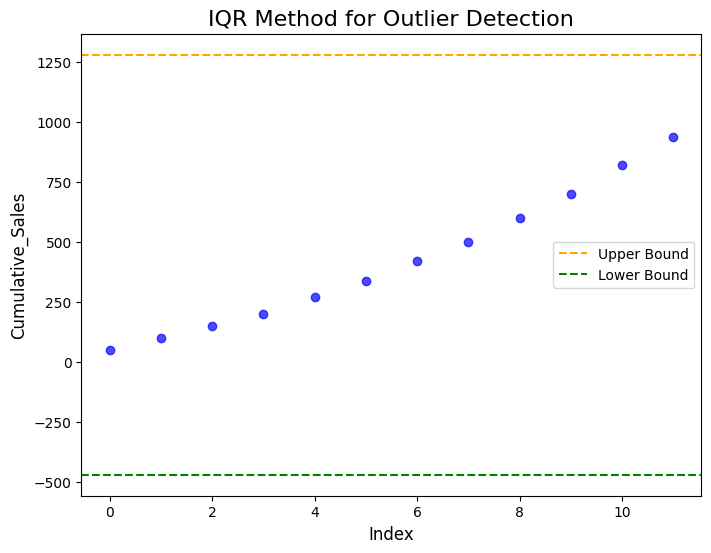

In [67]:
viz = vizualize()
viz.outlier_iqrplots(df,df['Cumulative_Sales'])